In [1]:
import pandas as pd
import gene_transcript_go_api as gtga
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
human_pannzer = gtga.parse_pannzer_annotation("../data/human.nr_off.pc.out")

human_path = "../res/human.intragene_isoform_diversity.data.tsv"
human_df = pd.read_csv(human_path, sep='\t')
human_df = human_df[human_df['Type'] == 'Observed']

human_path_net = "../res/human.no_empty_transcript.intragene_isoform_diversity.data.tsv"
human_df_net = pd.read_csv(human_path_net, sep='\t')
human_df_net = human_df_net[human_df_net['Type'] == 'Observed']

# Semantic similarity VS Protein length

In [3]:
human_df['Mean length'] = human_df["Gene"].apply(human_pannzer.get_gene).apply(gtga.Gene.mean_isoforms_length)
human_df_net['Mean length'] = human_df_net["Gene"].apply(human_pannzer.get_gene).apply(gtga.Gene.mean_isoforms_length)

human_df

,Gene,Type,Number of isoform,Jaccard Index,Dice coefficient,Overlap coefficient,Redundance metric,Stdev number GO term,BP similarity,CC similarity,MF similarity,Mean length
0,ENSG00000292344,Observed,7,0.476190,0.496599,1.0,0.500000,4.453845,0.523810,0.714286,0.523810,146.000
1,ENSG00000292358,Observed,1,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,517.000
2,ENSG00000292327,Observed,2,0.000000,0.000000,1.0,0.000000,14.500000,1.000000,0.000000,0.000000,372.500
3,ENSG00000292354,Observed,2,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,259.500
4,ENSG00000292363,Observed,2,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,316.000
...,...,...,...,...,...,...,...,...,...,...,...,...
19342,ENSG00000008735,Observed,1,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,825.000
19343,ENSG00000100299,Observed,2,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,467.000
19344,ENSG00000251322,Observed,5,0.302679,0.305310,1.0,0.502232,163.873610,0.400000,0.476100,0.400000,933.800
19345,ENSG00000100312,Observed,2,0.000000,0.000000,1.0,0.000000,15.000000,0.000000,0.000000,0.000000,317.500


Text(0.5, 1.0, 'Mean length by number of isoform (human observed)')

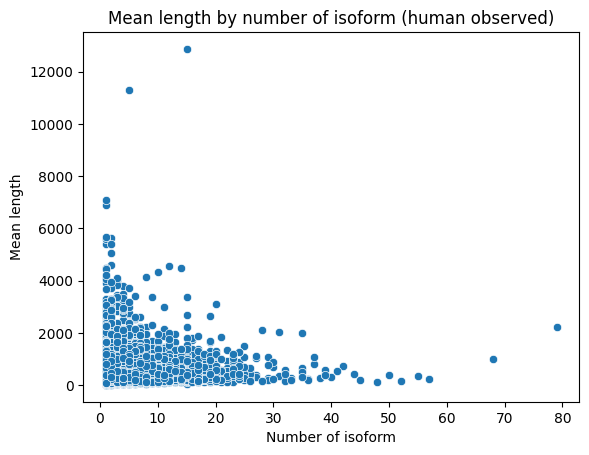

In [4]:
sns.scatterplot(human_df, x="Number of isoform", y="Mean length").set_title("Mean length by number of isoform (human observed)")

Text(0.5, 1.0, 'Mean length by number of isoform (human observed no empty transcript)')

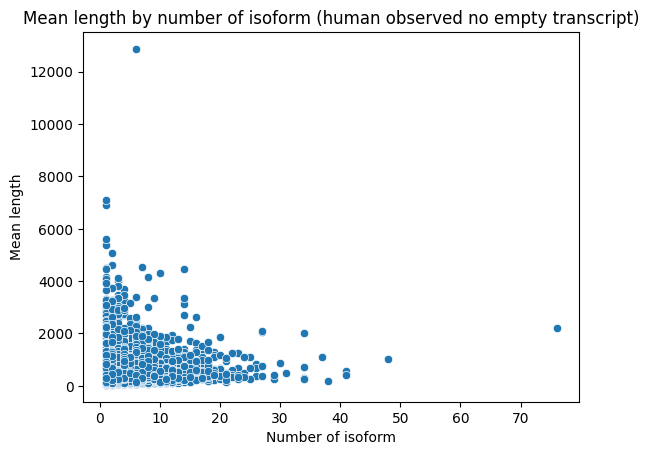

In [5]:
sns.scatterplot(human_df_net, x="Number of isoform", y="Mean length").set_title("Mean length by number of isoform (human observed no empty transcript)")

[Text(0.5, 0, 'BP similarity'), Text(0, 0.5, 'Mean length')]

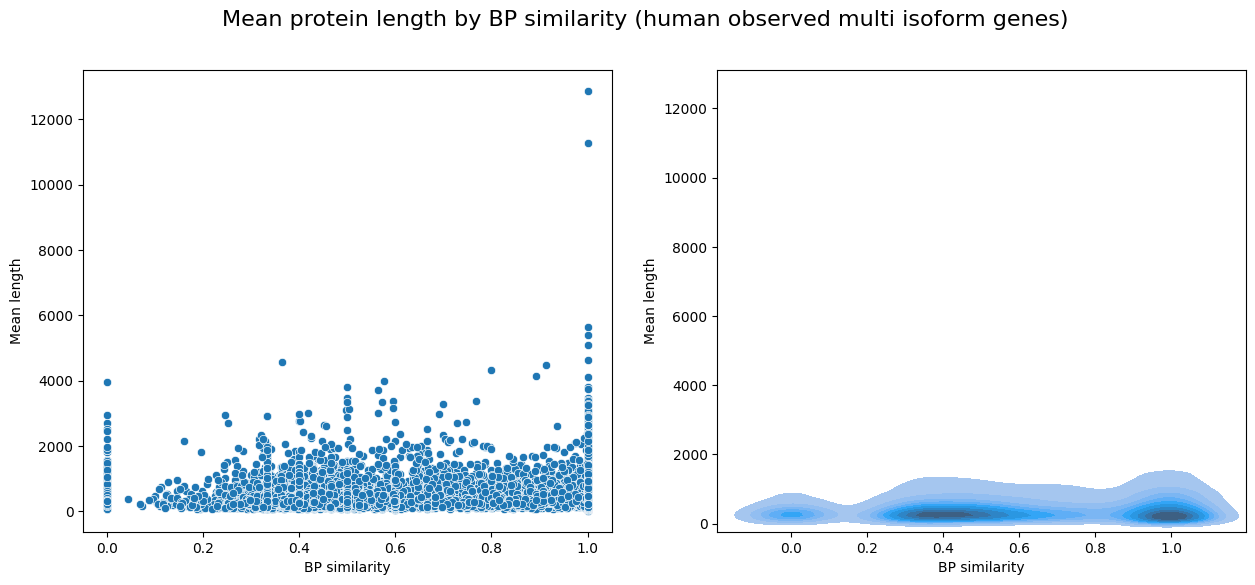

In [6]:
fig , ax  = plt.subplots(1,2,figsize=(15, 6))
fig.suptitle("Mean protein length by BP similarity (human observed multi isoform genes)", fontsize=16)
plot = sns.scatterplot(
    data = human_df[human_df["Number of isoform"] > 1],
    x = 'BP similarity',
    y = 'Mean length',
    ax=ax[0]
#    fill=True
)
ax[0].set(xlabel='BP similarity', ylabel='Mean length')
plot = sns.kdeplot(
    data = human_df[human_df["Number of isoform"] > 1],
    x = 'BP similarity',
    y = 'Mean length',
    ax=ax[1],
    fill=True)
ax[1].set(xlabel='BP similarity', ylabel='Mean length')

[Text(0.5, 0, 'BP similarity'), Text(0, 0.5, 'Mean length')]

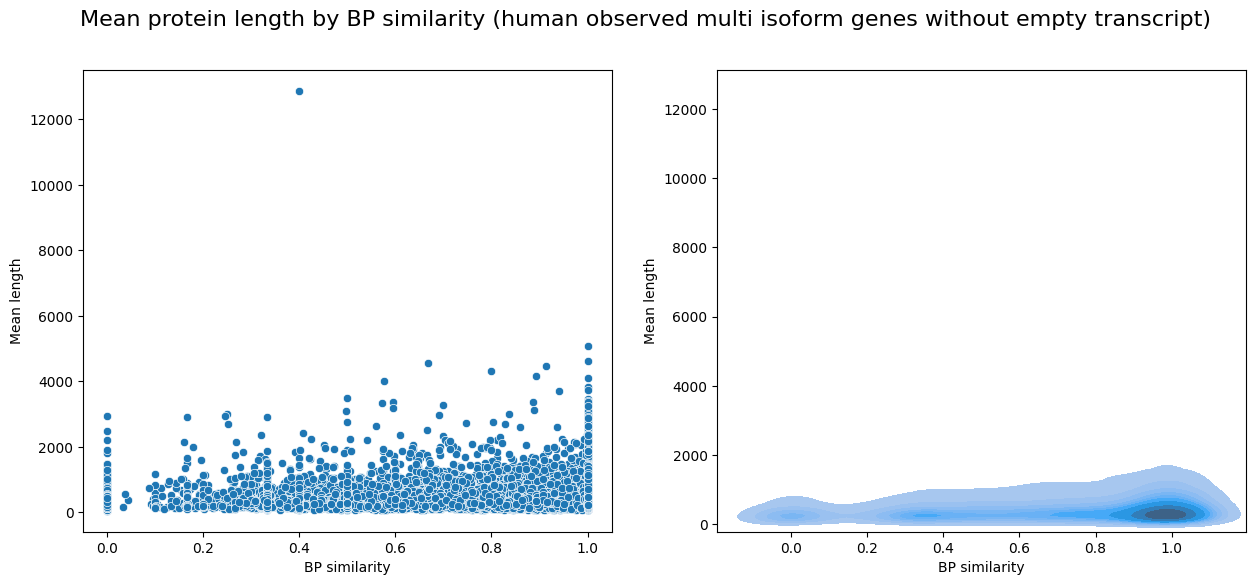

In [22]:
fig , ax  = plt.subplots(1,2,figsize=(15, 6))
fig.suptitle("Mean protein length by BP similarity (human observed multi isoform genes without empty transcript)", fontsize=16)
plot = sns.scatterplot(
    data = human_df_net[human_df_net["Number of isoform"] > 1],
    x = 'BP similarity',
    y = 'Mean length',
    ax=ax[0]
#    fill=True
)
ax[0].set(xlabel='BP similarity', ylabel='Mean length')
plot = sns.kdeplot(
    data = human_df_net[human_df_net["Number of isoform"] > 1],
    x = 'BP similarity',
    y = 'Mean length',
    ax=ax[1],
    fill=True)
ax[1].set(xlabel='BP similarity', ylabel='Mean length')

## Exon number vs semsim

In [8]:
annotation_human = pd.read_csv('../data/gencode.v45.human.protein_coding.no_readthrough.no_redundant_transcript.gff3', sep='\t', header=None)
annotation_human

,0,1,2,3,4,5,6,7,8
0,chr1,HAVANA,gene,65419,71585,.,+,.,ID=ENSG00000186092.7;gene_id=ENSG00000186092.7...
1,chr1,HAVANA,transcript,65419,71585,.,+,.,ID=ENST00000641515.2;Parent=ENSG00000186092.7;...
2,chr1,HAVANA,exon,65419,65433,.,+,.,ID=exon:ENST00000641515.2:1;Parent=ENST0000064...
3,chr1,HAVANA,exon,65520,65573,.,+,.,ID=exon:ENST00000641515.2:2;Parent=ENST0000064...
4,chr1,HAVANA,CDS,65565,65573,.,+,0,ID=CDS:ENST00000641515.2;Parent=ENST0000064151...
...,...,...,...,...,...,...,...,...,...
1474595,chrM,ENSEMBL,CDS,14149,14673,.,-,0,ID=CDS:ENST00000361681.2;Parent=ENST0000036168...
1474596,chrM,ENSEMBL,gene,14747,15887,.,+,.,ID=ENSG00000198727.2;gene_id=ENSG00000198727.2...
1474597,chrM,ENSEMBL,transcript,14747,15887,.,+,.,ID=ENST00000361789.2;Parent=ENSG00000198727.2;...
1474598,chrM,ENSEMBL,exon,14747,15887,.,+,.,ID=exon:ENST00000361789.2:1;Parent=ENST0000036...


In [9]:
annotation_exon_humain = annotation_human[annotation_human[2]=='exon']
annotation_exon_humain

,0,1,2,3,4,5,6,7,8
2,chr1,HAVANA,exon,65419,65433,.,+,.,ID=exon:ENST00000641515.2:1;Parent=ENST0000064...
3,chr1,HAVANA,exon,65520,65573,.,+,.,ID=exon:ENST00000641515.2:2;Parent=ENST0000064...
5,chr1,HAVANA,exon,69037,71585,.,+,.,ID=exon:ENST00000641515.2:3;Parent=ENST0000064...
9,chr1,HAVANA,exon,450740,451678,.,-,.,ID=exon:ENST00000426406.4:1;Parent=ENST0000042...
13,chr1,HAVANA,exon,685716,686654,.,-,.,ID=exon:ENST00000332831.5:1;Parent=ENST0000033...
...,...,...,...,...,...,...,...,...,...
1474582,chrM,ENSEMBL,exon,10470,10766,.,+,.,ID=exon:ENST00000361335.1:1;Parent=ENST0000036...
1474586,chrM,ENSEMBL,exon,10760,12137,.,+,.,ID=exon:ENST00000361381.2:1;Parent=ENST0000036...
1474590,chrM,ENSEMBL,exon,12337,14148,.,+,.,ID=exon:ENST00000361567.2:1;Parent=ENST0000036...
1474594,chrM,ENSEMBL,exon,14149,14673,.,-,.,ID=exon:ENST00000361681.2:1;Parent=ENST0000036...


In [10]:
def infogff2dict(x):
    return dict( (k,v) for k,v in [element.split('=') for element in x.split(';')])

In [11]:
gene2rawexonnb = dict()
for index, row in annotation_exon_humain.iterrows():
    gene = infogff2dict(row[8])['gene_id'].split('.')[0]
    if gene in gene2rawexonnb:
        gene2rawexonnb[gene] += 1
    else:
        gene2rawexonnb[gene] = 1

In [12]:
human_df['Raw Exon Nb'] = human_df["Gene"].apply(gene2rawexonnb.get)
human_df['Mean Nb Exon'] = human_df['Raw Exon Nb']/human_df['Number of isoform']
human_df_net['Raw Exon Nb'] = human_df_net["Gene"].apply(gene2rawexonnb.get)
human_df_net['Mean Nb Exon'] = human_df_net['Raw Exon Nb']/human_df_net['Number of isoform']

Text(0.5, 1.0, 'Mean nb exon by number of isoform (human observed)')

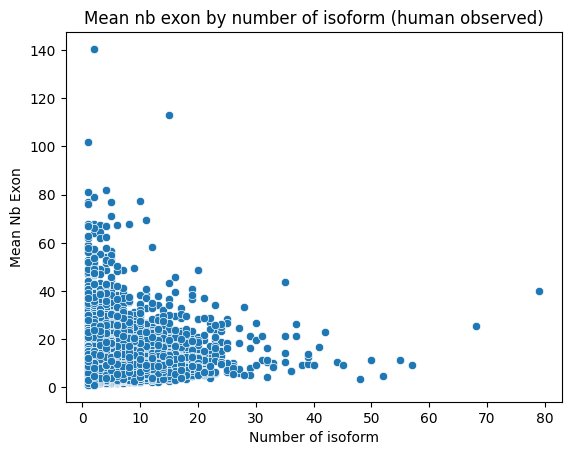

In [23]:
sns.scatterplot(human_df, x="Number of isoform", y="Mean Nb Exon").set_title("Mean nb exon by number of isoform (human observed)")

[Text(0.5, 0, 'BP similarity'), Text(0, 0.5, 'Mean Nb Exon')]

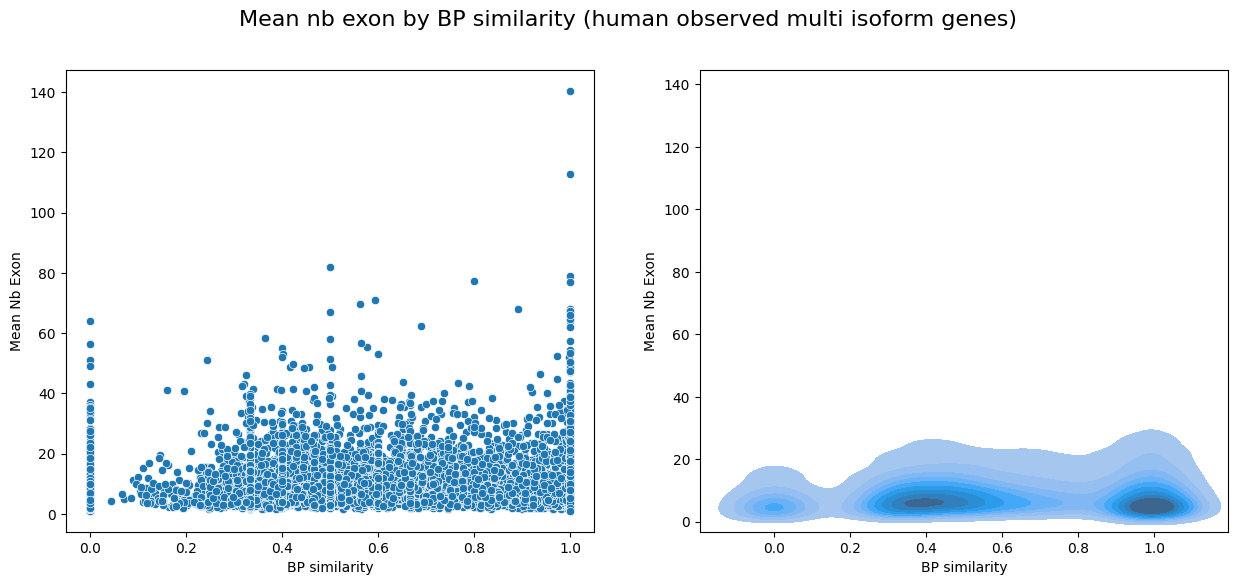

In [27]:
fig , ax  = plt.subplots(1,2,figsize=(15, 6))
fig.suptitle("Mean nb exon by BP similarity (human observed multi isoform genes)", fontsize=16)
plot = sns.scatterplot(
    data = human_df[human_df["Number of isoform"] > 1],
    x = 'BP similarity',
    y = 'Mean Nb Exon',
    ax=ax[0]
#    fill=True
)
ax[0].set(xlabel='BP similarity', ylabel='Mean Nb Exon')
plot = sns.kdeplot(
    data = human_df[human_df["Number of isoform"] > 1],
    x = 'BP similarity',
    y = 'Mean Nb Exon',
    ax=ax[1],
    fill=True)
ax[1].set(xlabel='BP similarity', ylabel='Mean Nb Exon')

[Text(0.5, 0, 'BP similarity'), Text(0, 0.5, 'Mean Nb Exon')]

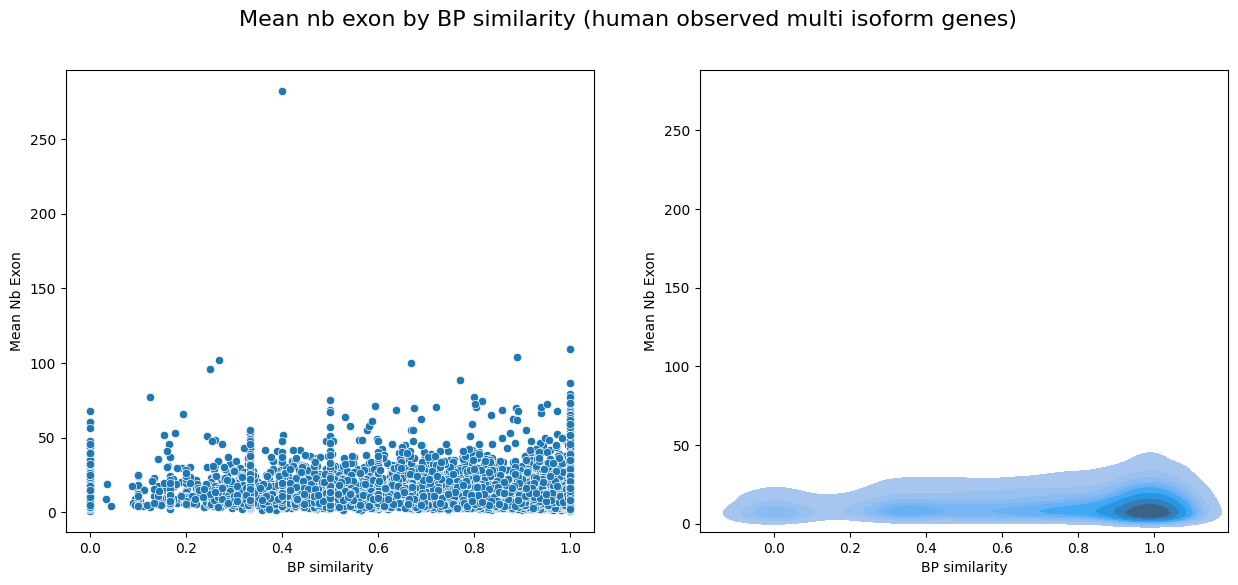

In [14]:
fig , ax  = plt.subplots(1,2,figsize=(15, 6))
fig.suptitle("Mean nb exon by BP similarity (human observed multi isoform genes)", fontsize=16)
plot = sns.scatterplot(
    data = human_df_net[human_df_net["Number of isoform"] > 1],
    x = 'BP similarity',
    y = 'Mean Nb Exon',
    ax=ax[0]
#    fill=True
)
ax[0].set(xlabel='BP similarity', ylabel='Mean Nb Exon')
plot = sns.kdeplot(
    data = human_df_net[human_df_net["Number of isoform"] > 1],
    x = 'BP similarity',
    y = 'Mean Nb Exon',
    ax=ax[1],
    fill=True)
ax[1].set(xlabel='BP similarity', ylabel='Mean Nb Exon')

## Diversity repartition

In [21]:
data_df = human_df[human_df['Number of isoform']!=1]
data_df

,Gene,Type,Number of isoform,Jaccard Index,Dice coefficient,Overlap coefficient,Redundance metric,Stdev number GO term,BP similarity,CC similarity,MF similarity,Mean length,Raw Exon Nb,Mean Nb Exon
0,ENSG00000292344,Observed,7,0.476190,0.496599,1.0,0.500000,4.453845,0.523810,0.714286,0.523810,146.000000,32,4.571429
2,ENSG00000292327,Observed,2,0.000000,0.000000,1.0,0.000000,14.500000,1.000000,0.000000,0.000000,372.500000,16,8.000000
3,ENSG00000292354,Observed,2,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,259.500000,12,6.000000
4,ENSG00000292363,Observed,2,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,316.000000,15,7.500000
5,ENSG00000292357,Observed,8,0.581464,0.640964,1.0,0.479167,13.251769,0.723929,0.629071,0.711643,315.250000,83,10.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,ENSG00000205560,Observed,3,0.241698,0.303045,1.0,0.346154,36.971460,0.261333,0.746000,0.333333,545.666667,40,13.333333
19343,ENSG00000100299,Observed,2,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,467.000000,16,8.000000
19344,ENSG00000251322,Observed,5,0.302679,0.305310,1.0,0.502232,163.873610,0.400000,0.476100,0.400000,933.800000,54,10.800000
19345,ENSG00000100312,Observed,2,0.000000,0.000000,1.0,0.000000,15.000000,0.000000,0.000000,0.000000,317.500000,9,4.500000


In [16]:
print(data_df['Jaccard Index'].mean())
print(sum(data_df['Jaccard Index']==1))
print(len(data_df))

0.5034311555667117
2349
14128


Text(0.5, 1.0, 'Histogram of human gene intrinsic diversity (Jaccard Index)')

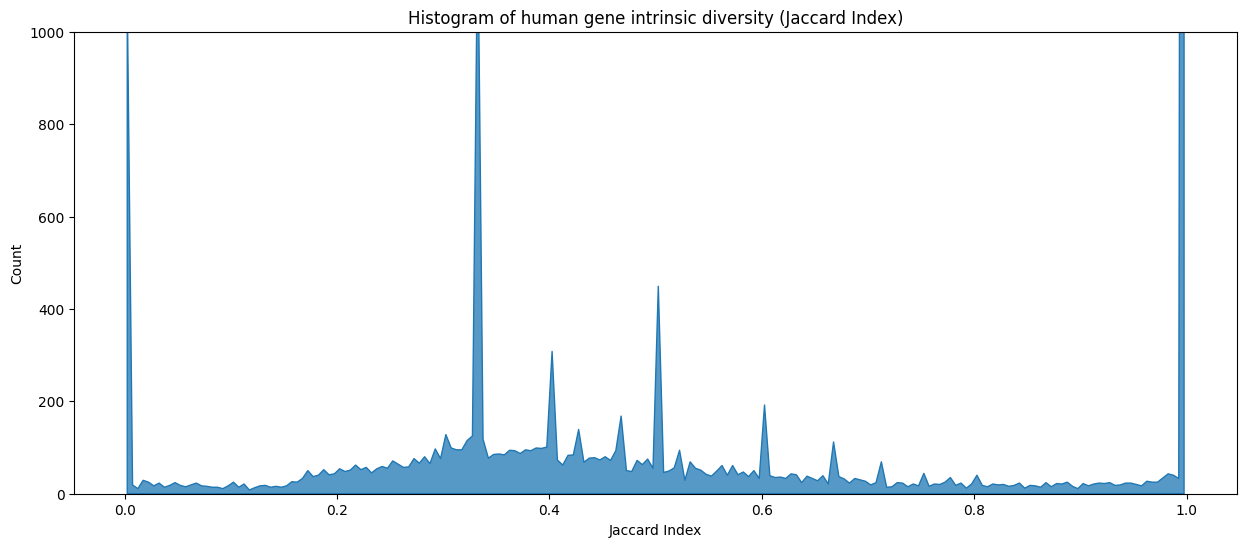

In [19]:
plt.figure(figsize=(15,6))
sns.histplot(human_df, x="Jaccard Index", element='poly', bins=200)
plt.ylim(0,1000)
plt.title('Histogram of human gene intrinsic diversity (Jaccard Index)')

0.6957575514712058
3042
11346


(0.0, 1000.0)

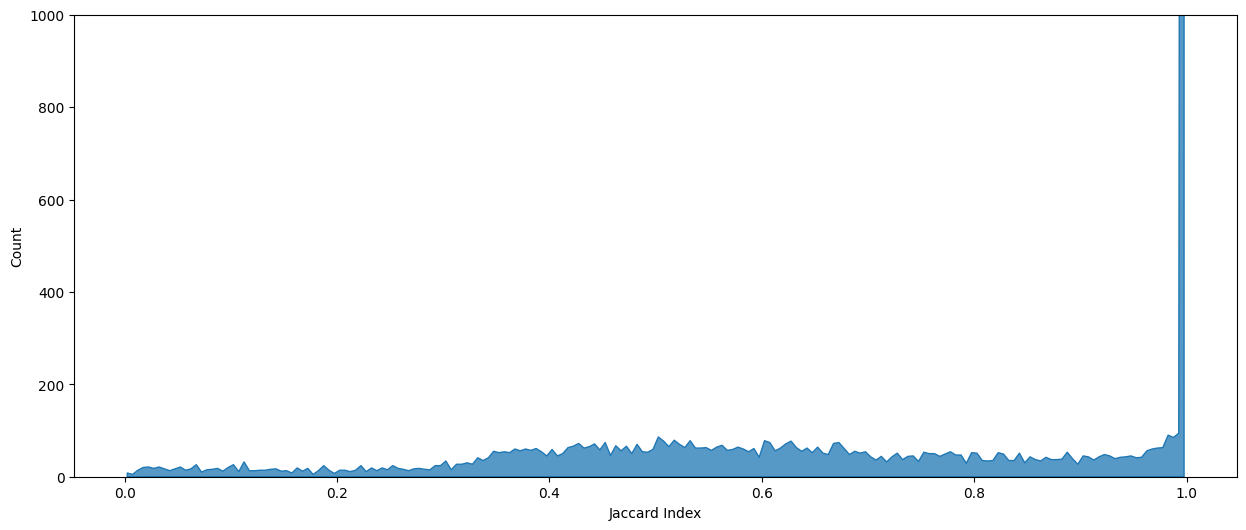

In [18]:
data_df = human_df_net[human_df_net['Number of isoform']!=1]
data_df
print(data_df['Jaccard Index'].mean())
print(sum(data_df['Jaccard Index']==1))
print(len(data_df))
plt.figure(figsize=(15,6))
sns.histplot(human_df_net, x="Jaccard Index", element='poly', bins=200)
plt.ylim(0,1000)